# Introduction to Pandas

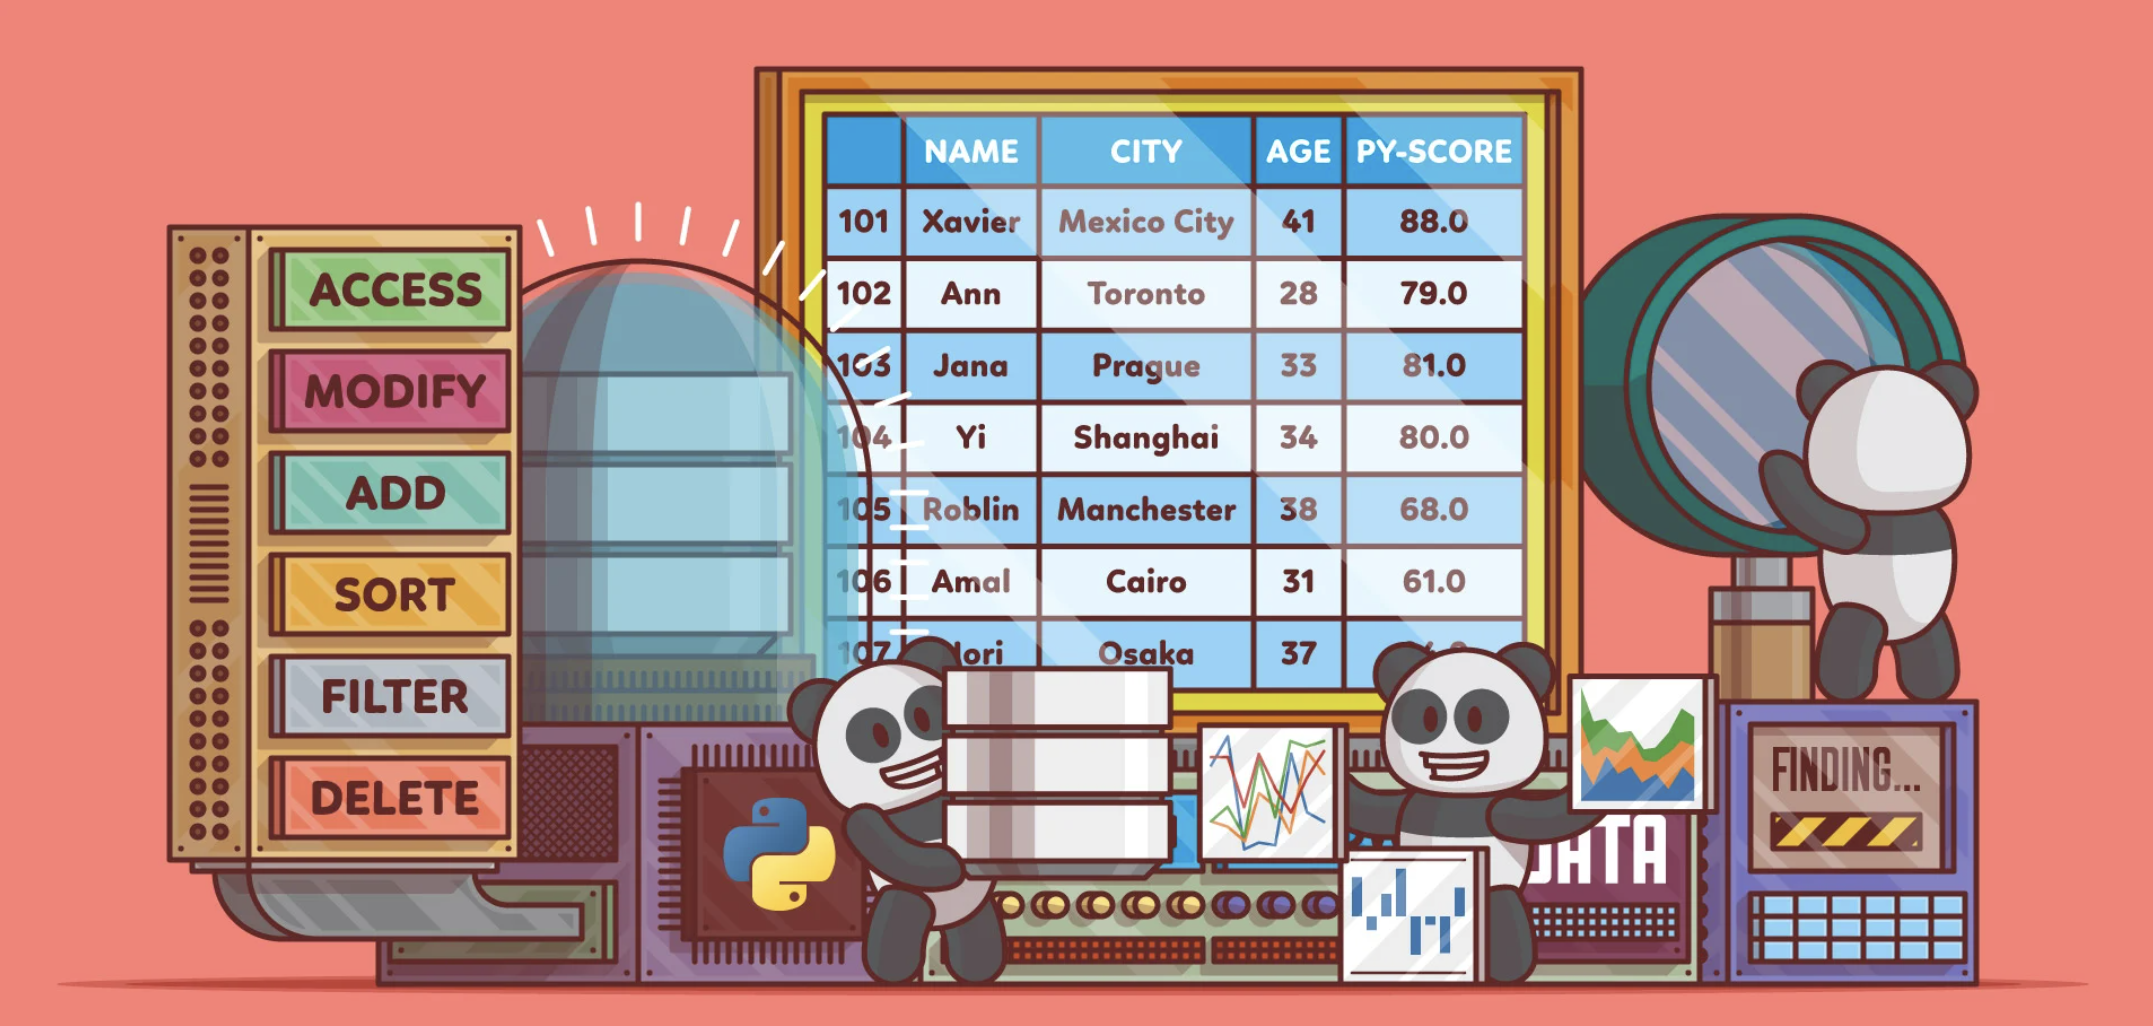
credit: https://realpython.com/

## Why Pandas?
    # Easy to use
    # Built on NumPy
    # Open Source
    # For Data Science / Analytics
    # Makes data ready for Machine Learning / Deep Learning

 <img src="pandas_features.png"  width = 600px,  height=70% >

#### The four main libraries of Pandas data structure are:
    
1. `Series` - Series is a one-dimensional array-like object containing data and labels (or index).  


2. `DataFrame` - DataFrame is a two-dimensional labeled data structure with columns of potentially different types.

## `Series`

* A __"one-dimensional"__    __"labeled"__ array capable of holding any data type
* Series can be created from --> `list`, `dictionary`, `ndarray` 
*    Pandas Series has an explicitly defined index associated with the values. 
* This explicit index definition gives the Series object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type. 
* For example, if we wish, we can use strings as an index.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Create different data structure

l1 = ['a','b','c','d','e']                      #list
l2 = [10,20,30,40,50]
d = {'c':3,'b':2,'a':1,'z':6,'y':5,'x':4}   #dictionary
a = np.array([100,200,300,400,500])                 #numpy array

In [3]:
#default index consist integers 0 through N - 1 (N -legth of array/list)
pd.Series(data=l1)

0    a
1    b
2    c
3    d
4    e
dtype: object

In [4]:
# passing another list as an index - (Length of both should be same)
pd.Series(data=l1, index=l2)

10    a
20    b
30    c
40    d
50    e
dtype: object

In [5]:
#similarly for numpy arrays
pd.Series(data=a, index=l1)

a    100
b    200
c    300
d    400
e    500
dtype: int32

In [6]:
# When you are only passing a dict, the index in the resulting Series will have the dict’s keys.
pd.Series(data=d,)

c    3
b    2
a    1
z    6
y    5
x    4
dtype: int64

In [7]:
#sorting the series on the keys of dict's keys(which is index). [works on both numeric & strings]
s1 = pd.Series(data=d,).sort_index()
s1

a    1
b    2
c    3
x    4
y    5
z    6
dtype: int64

In [8]:
# reversing dictionary using dict. comprehension for making string keys
d_rev = {y:x for x,y in d.items()}
d_rev

{3: 'c', 2: 'b', 1: 'a', 6: 'z', 5: 'y', 4: 'x'}

In [9]:
s2 = pd.Series(data=d_rev)
s2

3    c
2    b
1    a
6    z
5    y
4    x
dtype: object

In [10]:
# numeric sorting
s2 = pd.Series(data=d_rev).sort_index()
s2

1    a
2    b
3    c
4    x
5    y
6    z
dtype: object

#### Ways in which we can grab data from a Series:
    
   * CASE 1 : When label is `Integer`:
      * You need to pass only that integer
      
      
   * CASE 2 : When label is `String`:
       * You can pass string
       * You can pass indexing value

In [11]:
s2

1    a
2    b
3    c
4    x
5    y
6    z
dtype: object

In [12]:
s2[5]

'y'

In [13]:
#Here ['a', 'b', 'c', 'x', 'y', 'z'] is interpreted as a list of indices, even though it contains strings instead of integers.
s1

a    1
b    2
c    3
x    4
y    5
z    6
dtype: int64

In [14]:
print(s1['c']) #either by grabbing label value.
print(s1[2])   #or by providing index values.

3
3


In [15]:
#You can slice a series, like you would slice a list
s1[2:5]

c    3
x    4
y    5
dtype: int64

In [16]:
#albeit s2[0] will throw key_error but in slicing it will work
s2[0:3]

1    a
2    b
3    c
dtype: object

In [17]:
type(s1)

pandas.core.series.Series

In [18]:
#to get the labels of series
s1.index

Index(['a', 'b', 'c', 'x', 'y', 'z'], dtype='object')

In [19]:
#to get the values of series
s1.values 

array([1, 2, 3, 4, 5, 6], dtype=int64)

## `DataFrame`

* DataFrame is a two-dimensional labeled data structure with columns (collection of Series combined together to share the same index positions) of potentially different types. 
* If a Series is an analog of a one-dimensional array with flexible indices, a DataFrame is an analog of a two-dimensional array with both flexible row indices and flexible column names.

#### Anatomy of a DataFrame
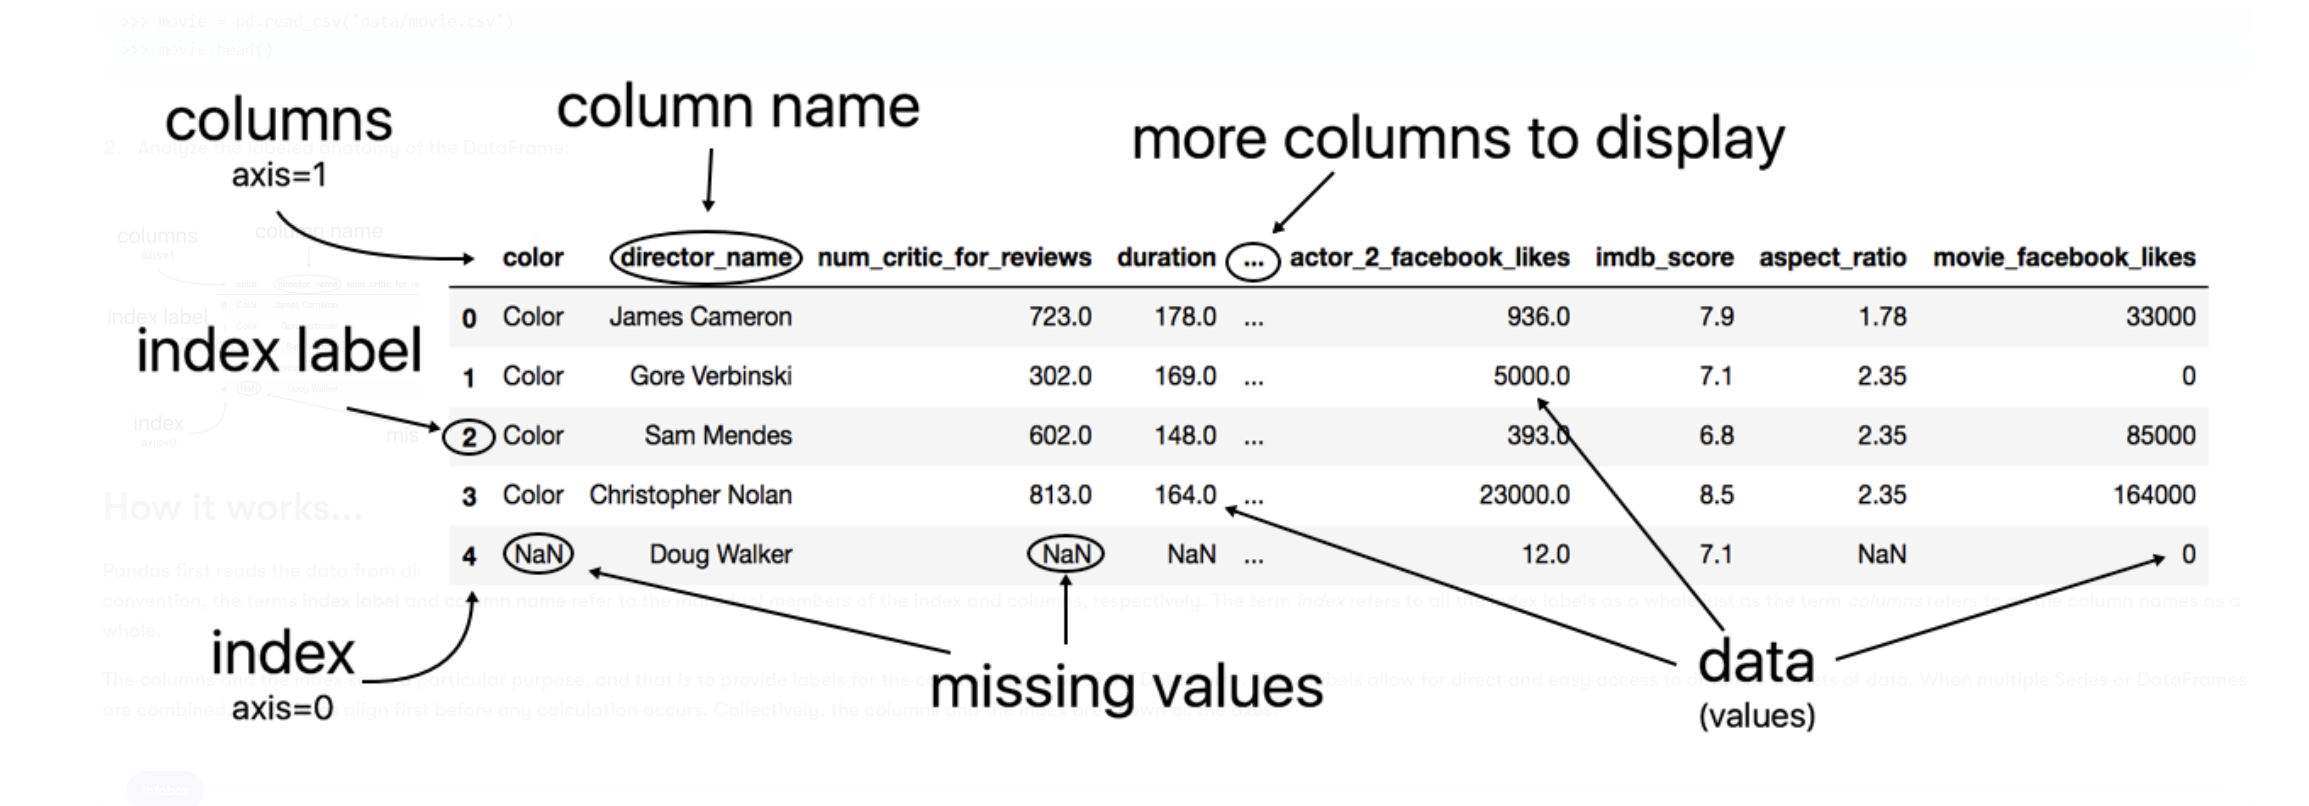


* You can create a DataFrame by using `pd.DataFrame()` and passing it a Python dictionary.

In [20]:
#Constructing DataFrame from a dictionary.
d = {'col1': [1, 2, 3, 4, 5], 'col2': ['a','b','c','d','e'], 'col3': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data=d)
df

,col1,col2,col3
0,1,a,10
1,2,b,20
2,3,c,30
3,4,d,40
4,5,e,50


In [21]:
# get a quick info about your dataframe/data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col1    5 non-null      int64 
 1   col2    5 non-null      object
 2   col3    5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 248.0+ bytes


In [22]:
# check for the null values.
df.isnull()

,col1,col2,col3
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [23]:
# count for the null values.
df.isnull().sum()

col1    0
col2    0
col3    0
dtype: int64

#### Selection and Indexing

In [24]:
# selecting a single column.
df['col1']

0    1
1    2
2    3
3    4
4    5
Name: col1, dtype: int64

In [25]:
# selecting a multi columns.
df[['col3','col2']]

,col3,col2
0,10,a
1,20,b
2,30,c
3,40,d
4,50,e


In [26]:
# selecting row by index
df.iloc[2]

col1     3
col2     c
col3    30
Name: 2, dtype: object

In [27]:
# selecting rows by slicing
df.iloc[2:5]

,col1,col2,col3
2,3,c,30
3,4,d,40
4,5,e,50


_NOTE_ : 
* If you have character in index, instead of iloc you can use `loc['label']`

In [28]:
#Adding a new column to the DataFrame

df['col4'] = df['col1'] + df['col3']
df

,col1,col2,col3,col4
0,1,a,10,11
1,2,b,20,22
2,3,c,30,33
3,4,d,40,44
4,5,e,50,55


In [29]:
#Removing Columns from DataFrame
df.drop(columns=['col4'], axis = 1, inplace=True)     # Use axis=0 for dropping rows and axis=1 for dropping columns
df

,col1,col2,col3
0,1,a,10
1,2,b,20
2,3,c,30
3,4,d,40
4,5,e,50


In [30]:
#Removing Columns from DataFrame
df.drop(index = [2,3], axis = 0, inplace=True)     
df

,col1,col2,col3
0,1,a,10
1,2,b,20
4,5,e,50


In [31]:
#after dropping the index can be reset to avoid key_errors.
df.reset_index(drop=True, inplace=True)
df

,col1,col2,col3
0,1,a,10
1,2,b,20
2,5,e,50
